In [1]:
import numpy as np
import matplotlib.pylab as plt

In [2]:
def sigmoid_function(x):
    return 1/(1+np.exp(-x))

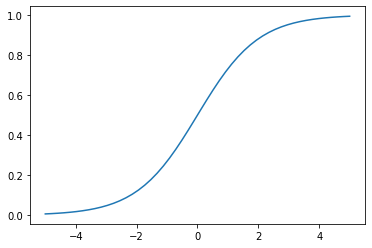

In [3]:
x = np.linspace(-5,5)
y = sigmoid_function(x)

plt.plot(x,y)
plt.show()

In [4]:
def tanh_function(x):
    return (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))

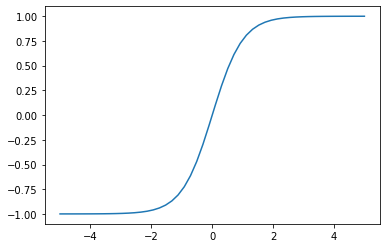

In [14]:
x = np.linspace(-5,5)
y = tanh_function(x)

plt.plot(x,y)
plt.show()

In [7]:
def relu_function(x):
    return np.where(x <= 0, 0, x)

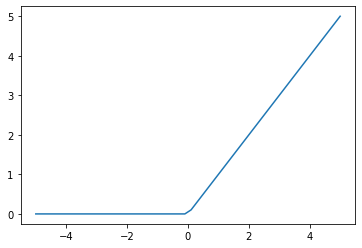

In [15]:
x = np.linspace(-5,5)
y = relu_function(x)

plt.plot(x,y)
plt.show()

In [16]:
def leaky_relu_function(x):
    return np.where(x <= 0, 0.01*x, x)

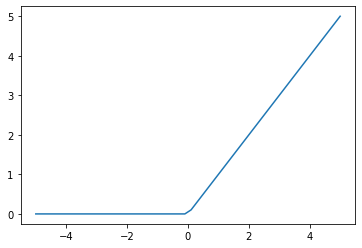

In [18]:
x = np.linspace(-5,5)
y = relu_function(x)

plt.plot(x,y)
plt.show()

In [19]:
def softmax_function(x):
    return np.exp(x)/np.sum(np.exp(x))

In [21]:
y = softmax_function(np.array([1,2,3]))
print(y)

[0.09003057 0.24472847 0.66524096]


# 신경망 구현
## 단일 뉴런 구현

In [124]:
def norm(k, Range=(0,1)):
    return k * (Range[1] - Range[0]) + Range[0]

0.304787415447453 1.2488869357086294


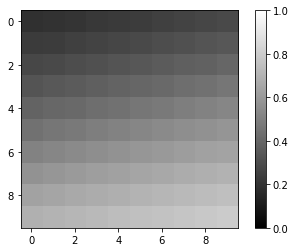

In [144]:
x = np.arange(-1.0, 1.0, 0.2)
y = np.arange(-1.0, 1.0, 0.2)

z = np.zeros((10,10))
from datetime import datetime
np.random.seed(datetime.now().second)

w_x = norm(np.random.rand(), Range=(-3,3))
w_y = norm(np.random.rand(), Range=(-3,3))
print(w_x, w_y)
bias = 0.1

for i in range(10):
    for j in range(10):
        u = x[i] * w_x + y[j] * w_y + bias
            
        Y = sigmoid_function(u)
        z[j][i] = Y
        
plt.imshow(z, 'gray', vmin = 0.0, vmax = 1.0)
plt.colorbar()
plt.show()

## 신경망의 각 층 구현
### regression

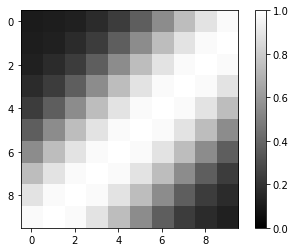

In [159]:
x = np.arange(-1.0, 1.0, 0.2)
y = np.arange(-1.0, 1.0, 0.2)

z = np.zeros((10,10))

w_im = 4 * np.ones((2,2))
w_mo = np.array([[1.0],
                 [-1.0]])

b_im = np.array([3.0,-3.0])
b_mo = np.array([0.1])

def middle_layer(x,w,b):
    u = np.dot(x, w) + b
    return sigmoid_function(u)

def output_layer(x,w,b):
    u = np.dot(x, w) + b
    return u

for i in range(10):
    for j in range(10):
        inp = np.array([x[i],y[j]])
        mid = middle_layer(inp,w_im,b_im)
        
        out=output_layer(mid,w_mo,b_mo)
        
        z[j][i] = out[0]

plt.imshow(z,'gray',vmin=0,vmax=1.0)
plt.colorbar()
plt.show()

### classification

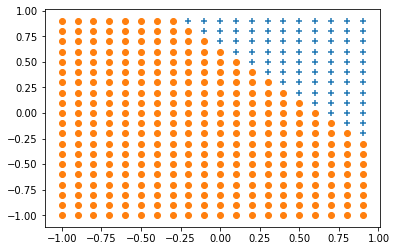

In [161]:
x = np.arange(-1.0,1.0,0.1)
y = np.arange(-1.0,1.0,0.1)

w_im = np.array([[1.0,2.0],[2.0,3.0]])
w_mo = np.array([[-1.0,1.0],[1.0,-1.0]])

b_im = np.array([0.3,-0.3])
b_mo - np.array([0.4,0.1])

def middle_layer(x,w,b):
    u = np.dot(x,w) + b
    return sigmoid_function(u)

def output_layer(x,w,b):
    u = np.dot(x,w) + b
    return softmax_function(u)


x_1 = []
y_1 = []
x_2 = []
y_2 = []

for i in range(20):
    for j in range(20):
        inp = np.array([x[i],y[j]])
        mid = middle_layer(inp, w_im, b_im)
        out = output_layer(mid, w_mo, b_mo)
        
        if out[0] > out[1]:
            x_1.append(x[i])
            y_1.append(y[j])
        else:
            x_2.append(x[i])
            y_2.append(y[j])
            
plt.scatter(x_1,y_1, marker='+')
plt.scatter(x_2,y_2, marker='o')

plt.show()